In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\laptop\Desktop\Projects\SMS-Spam-Detection\SMS Spam Collection Dataset.csv',encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4564,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN
1143,ham,And is there a way you can send shade's stuff ...,NaN,NaN,NaN
1579,ham,"Why is that, princess? I bet the brothas are a...",NaN,NaN,NaN
2097,ham,Are you the cutest girl in the world or what,NaN,NaN,NaN
1725,ham,You know there is. I shall speak to you in &l...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvement
# Website
# Deploy

In [6]:
## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns

df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
5007,ham,Go fool dont cheat others ok
3743,ham,Nobody names their penis a girls name this sto...
3448,ham,Sorry. || mail? ||
1588,ham,At 4. Let's go to bill millers
4071,spam,Loans for any purpose even if you have Bad Cre...


In [10]:
# renaming the columns

df.rename(columns = {'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2399,ham,Oh... Kay... On sat right?
5527,ham,"Total disappointment, when I texted you was th..."
1067,ham,Meeting u is my work. . . Tel me when shall i ...
2054,ham,Y so late but i need to go n get da laptop...
3623,ham,No message..no responce..what happend?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Check for duplicate values

df.duplicated().sum()

403

In [16]:
# Remove duplicates

df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

In [19]:
## EDA

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2b5da931c40>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

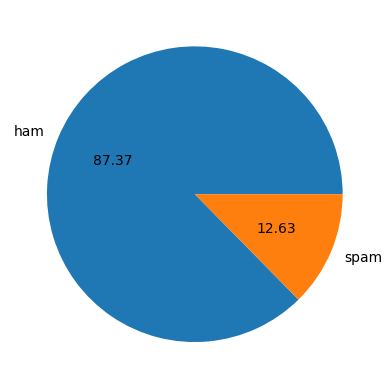

In [22]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")

In [23]:
# Data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# number of characters

df['num_characters'] = df['text'].apply(len)

In [27]:
# number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
# number of sentences

df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.rename(columns={'num_sentence':'num_sentences'},inplace = True)

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# spam

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

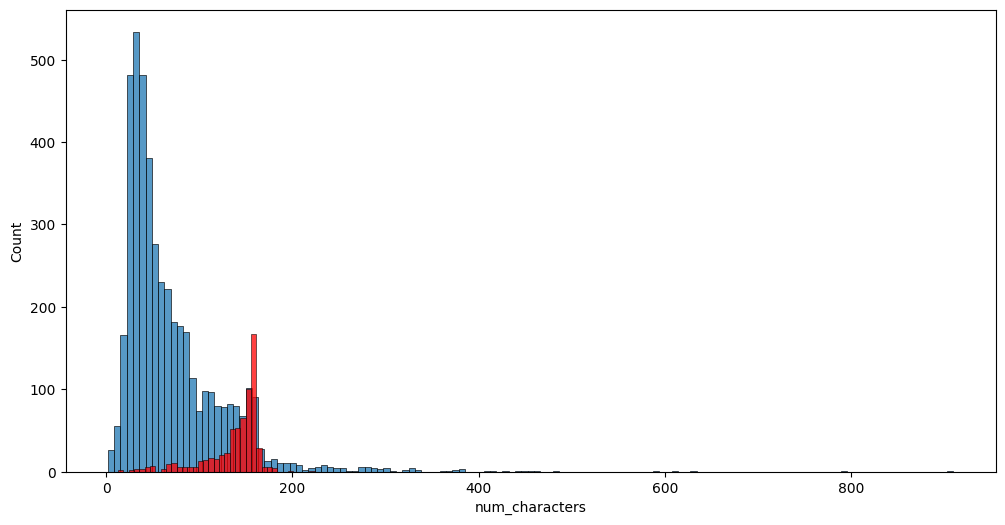

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

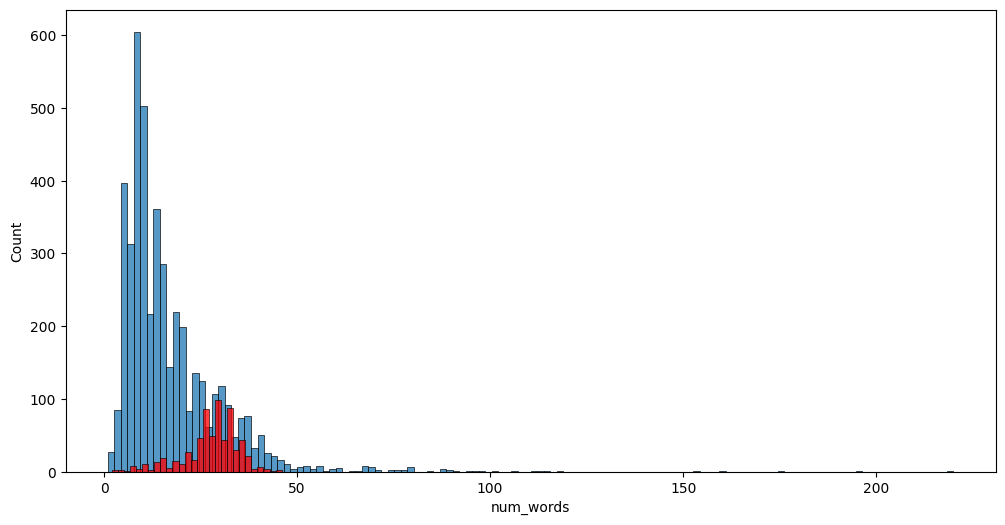

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

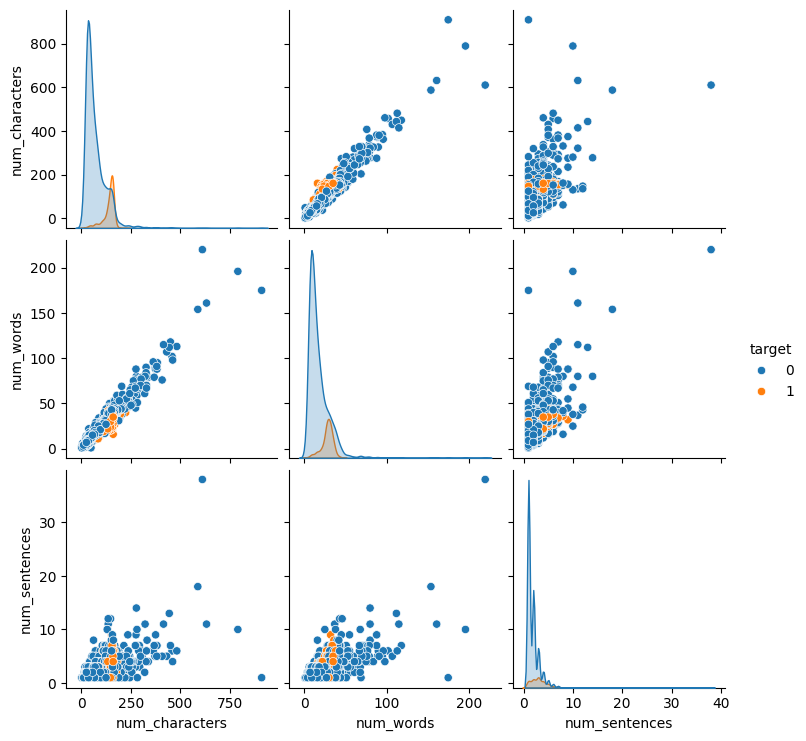

In [40]:
sns.pairplot(df,hue='target')

In [41]:
new_df2 = df[['target','num_characters','num_words','num_sentences']]

<Axes: >

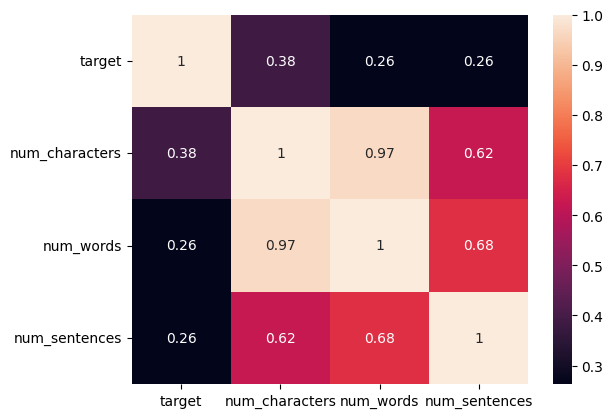

In [42]:
sns.heatmap(new_df2.corr(),annot = True)

In [43]:
## data Preprocessing

# lower case
# Tokenization
# Removing special characters
# removing stopwords and punctuation
# stemming


In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [49]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [50]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

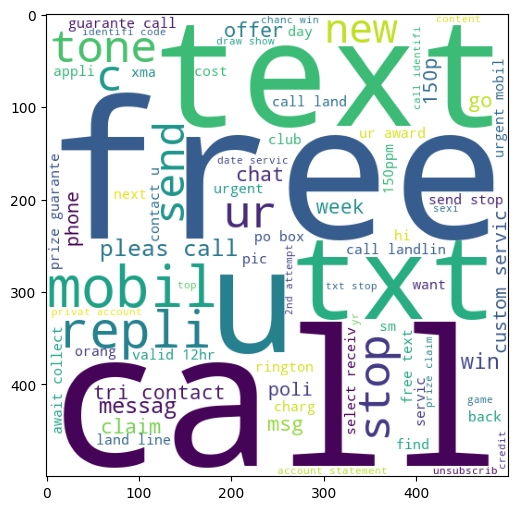

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

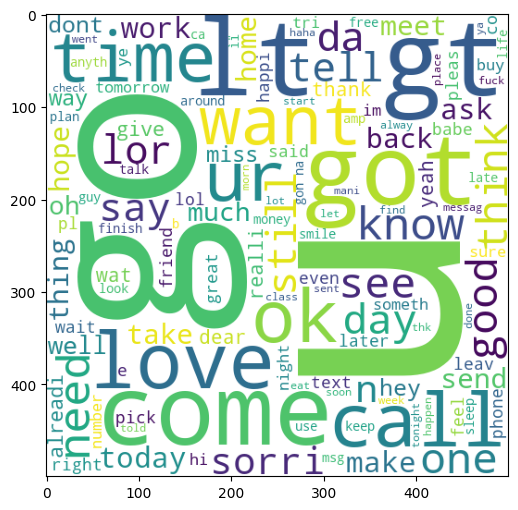

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

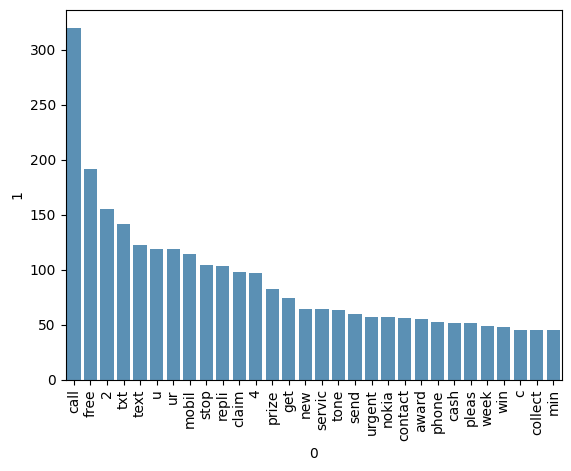

In [62]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

35404

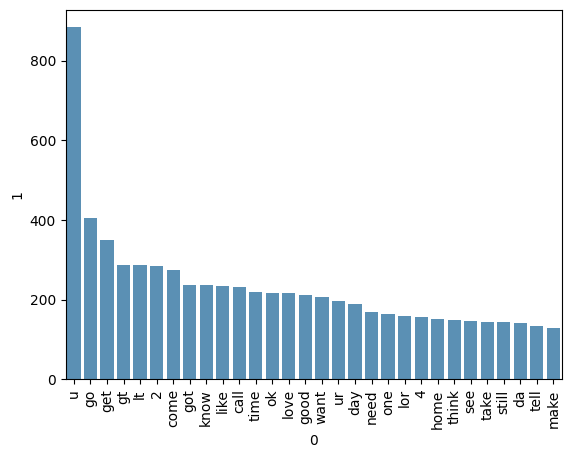

In [65]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# Model Building 

In [67]:
# using count vectorizer

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [69]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [70]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
y = df['target'].values

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [75]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [80]:
# using tfidf

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [82]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [84]:
y2 = df['target'].values

In [85]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [86]:
gnb.fit(X2_train,y2_train)
y2_pred1 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred1))
print(confusion_matrix(y2_test,y2_pred1))
print(precision_score(y2_test,y2_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [87]:
mnb.fit(X2_train,y2_train)
y2_pred2 = mnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred2))
print(confusion_matrix(y2_test,y2_pred2))
print(precision_score(y2_test,y2_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [88]:
bnb.fit(X2_train,y2_train)
y2_pred3 = bnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred3))
print(confusion_matrix(y2_test,y2_pred3))
print(precision_score(y2_test,y2_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [89]:
# tfidf --> mnb

In [90]:
pip install xgboost

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [92]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [93]:
clfs = {
    'svc':svc,
    'knc':knc,
    'mnb':mnb,
    'dtc':dtc,
    'lrc':lrc,
    'rfc':rfc,
    'abc':abc,
    'bc':bc,
    'etc':etc,
    'gbdt':gbdt,
    'xgb':xgb
}

In [94]:
def train_classifiers(clf,X2_train,y2_train,X2_test,y2_test):
    clf.fit(X2_train,y2_train)
    y_pred = clf.predict(X2_test)
    accuracy = accuracy_score(y2_test,y_pred)
    precision = precision_score(y2_test,y_pred)
    
    return accuracy,precision

In [95]:
train_classifiers(svc,X2_train,y2_train,X2_test,y2_test)

(0.9758220502901354, 0.9747899159663865)

In [96]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifiers(clf,X2_train,y2_train,X2_test,y2_test)
    
    print('for  - ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  -  svc
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
for  -  knc
Accuracy -  0.9052224371373307
Precision -  1.0
for  -  mnb
Accuracy -  0.9709864603481625
Precision -  1.0
for  -  dtc
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
for  -  lrc
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
for  -  rfc
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
for  -  abc
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
for  -  bc
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
for  -  etc
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
for  -  gbdt
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
for  -  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [97]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [98]:
performance_df

,Algorithm,Accuracy,Precision
1,knc,0.905222,1.000000
2,mnb,0.970986,1.000000
5,rfc,0.975822,0.982906
0,svc,0.975822,0.974790
8,etc,0.974855,0.974576
4,lrc,0.958414,0.970297
6,abc,0.960348,0.929204
10,xgb,0.967118,0.926230
9,gbdt,0.946809,0.919192
7,bc,0.958414,0.868217


In [99]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [100]:
performance_df1

,Algorithm,variable,value
0,knc,Accuracy,0.905222
1,mnb,Accuracy,0.970986
2,rfc,Accuracy,0.975822
3,svc,Accuracy,0.975822
4,etc,Accuracy,0.974855
5,lrc,Accuracy,0.958414
6,abc,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,gbdt,Accuracy,0.946809
9,bc,Accuracy,0.958414


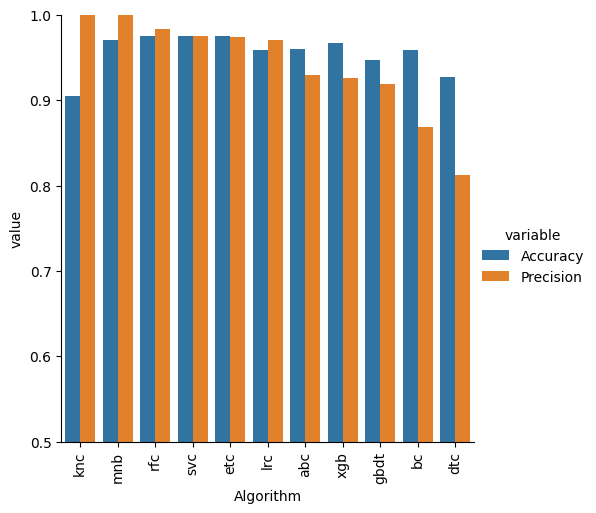

In [101]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [102]:
# model improve 
# change the max features parameter of tfidf

In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [104]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [105]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,knc,0.905222,1.000000,0.905222,1.000000
1,mnb,0.970986,1.000000,0.970986,1.000000
2,rfc,0.975822,0.982906,0.975822,0.982906
3,svc,0.975822,0.974790,0.975822,0.974790
4,etc,0.974855,0.974576,0.974855,0.974576
5,lrc,0.958414,0.970297,0.958414,0.970297
6,abc,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230
8,gbdt,0.946809,0.919192,0.946809,0.919192
9,bc,0.958414,0.868217,0.958414,0.868217


In [106]:
temp_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [107]:
new_df_scaled = new_df.merge(temp_df_scaled,on='Algorithm')

In [108]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,knc,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,mnb,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,rfc,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,svc,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,etc,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,lrc,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,abc,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,gbdt,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,bc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [109]:
# voting Classifier

svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('rf',rfc)],voting='soft')

In [111]:
voting.fit(X2_train,y2_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [112]:
y_pred = voting.predict(X2_test)
print('Accuracy - ',accuracy_score(y2_test,y_pred))
print('Precision - ',precision_score(y2_test,y_pred))

Accuracy -  0.9777562862669246
Precision -  0.9831932773109243


In [113]:
# applying stacking

estimators=[('svm',svc),('nb',mnb),('rf',rfc)]
final_estimator = RandomForestClassifier()

In [114]:
from sklearn.ensemble import StackingClassifier

In [115]:
stc = StackingClassifier(estimators =estimators,final_estimator=final_estimator )

In [116]:
stc.fit(X2_train,y2_train)
y_pred = stc.predict(X2_test)
print('Accuracy - ',accuracy_score(y2_test,y_pred))
print('Precision - ',precision_score(y2_test,y_pred))

Accuracy -  0.9806576402321083
Precision -  0.9538461538461539


In [117]:
# we select Multinomial Naive bayes

In [120]:
mnb.fit(X2_train,y2_train)

MultinomialNB()

In [121]:
import pickle

In [122]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))